# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Lets take a look at some basic features of the souce data file

datafile = 'data/dataset.csv'               # Define your source data file
df = pd.read_csv(datafile)                  # Read in your CSV
print('This dataset has shape:', df.shape)  # Get data shape
df.head()                                   # Return the first 5 rows

This dataset has shape: (496, 10)


,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
0,3.371,16.877,15.345,8.080,8.510,14.404,5.904,-0.368,11.604,3.321
1,11.765,18.278,9.311,4.095,13.699,1.487,16.061,7.425,5.981,-0.338
2,3.966,2.498,9.110,12.823,-0.337,15.771,5.326,18.289,12.466,9.633
3,11.498,16.627,10.134,3.632,13.124,1.083,17.141,8.624,6.133,0.015
4,12.262,18.252,10.158,4.073,14.841,2.451,15.654,8.131,5.142,-0.079


## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

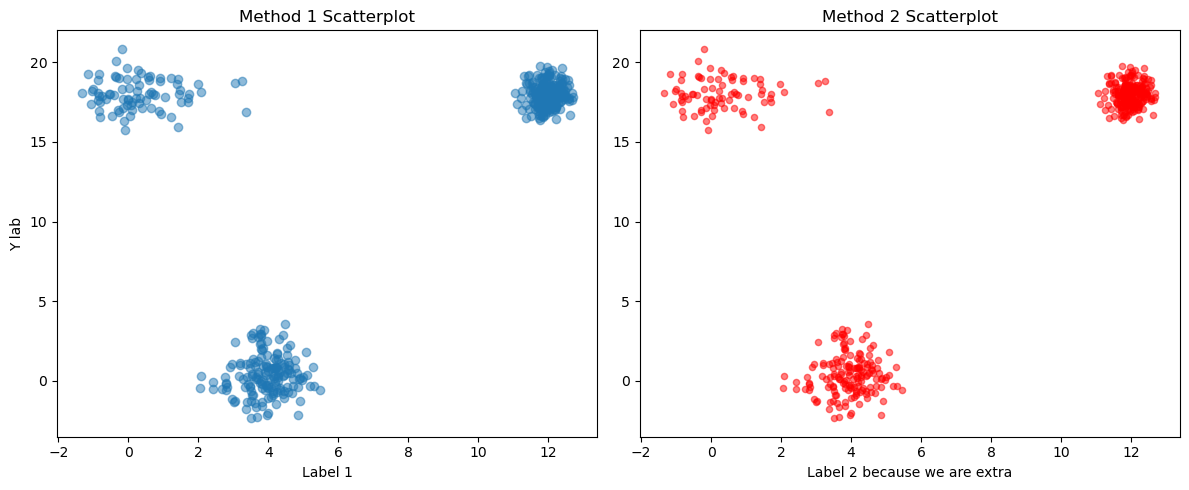

I see three clusters


In [51]:

# Below I will use two methods to make the same scatter plot.

datafile = 'data/dataset.csv'                   # Define your source data file
df = pd.read_csv(datafile)                      # Read in your CSV
plt.figure(figsize=(12,5))                      # Set your figure size

# Method 01
plt.subplot(1,2,1)                              # Plot the two subplots together 
plt.scatter(data=df,                            # Generate scatter plot
            x = 'dim1', 
            y = 'dim2',
            alpha=0.5)                          # Set transparency    
plt.title('Method 1 Scatterplot')               # Set title
plt.xlabel('Label 1')                           # Set X label
plt.ylabel('Y lab')                             # Set Y label

# Method 02
plt.subplot(1,2,2)                              # Plot the two subplots together 
df.plot.scatter(x = 'dim1',                     # Generate scatter plot
                y = 'dim2', 
                ax=plt.gca(),                   # Set the axes of the second plot to match the first
                c = 'red',                      # Set color
                alpha=0.5)                      # Set transparency                    
plt.title('Method 2 Scatterplot')               # Set title
plt.xlabel('Label 2 because we are extra')      # Set X label
plt.ylabel('')                                  # Set Y label to nothing

# Finishing touches
plt.tight_layout()                              # Use this to ensure your figure fits
plt.show()
print('I see three clusters')


## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

The explained varience raio is:
 [0.71764809 0.14764088 0.0660396  0.05248787 0.00817722 0.00235135
 0.00176303 0.00156625 0.00128678 0.00103894]
Now I see 5 clusters!


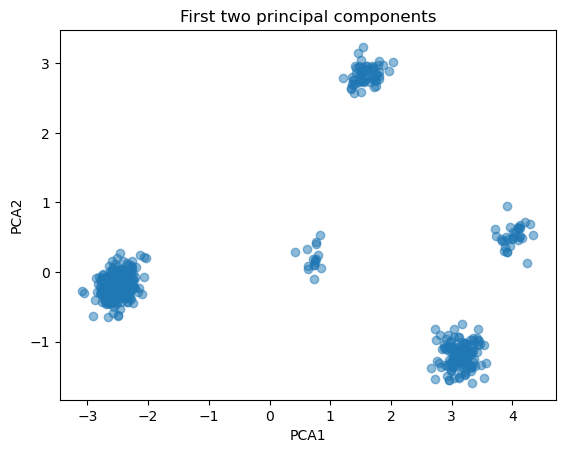

In [129]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Lets do some PCA!

datafile = 'data/dataset.csv'                   # Define your source data file
df = pd.read_csv(datafile)                      # Read in your CSV

# First im going to scale the data. 
# I have a philosophical question about this step, lets talk in class.

scaler = StandardScaler()                       # Assign your scaler
scaler.fit(df)                                  # Compute the mean and stdev for later scaling
df_scaled = scaler.transform(df)                # Transform your data

# Next, run the PCA to check whether PCA is an appropriate analysis for the data.
# We would expect to see a high explained variance ratio in one component, ie. the principle component.

pca = PCA(n_components=10)                      # 1. create and configure the model (call it "pca")
pca.fit(df_scaled)                              # 2. fit the model to the data (use pca.fit(...) )
n = pca.explained_variance_ratio_               # 3. look at the model's explained_variance_ratio_  
X_pca = pca.transform(df_scaled)                # 4. transform the data to a new array
print('The explained varience raio is:\n', n)

# Now lets plot the first two components
plt.scatter(X_pca[:,0],                         # Generate scatter plot
            X_pca[:,1], 
            alpha = 0.5)                        # Set transparency
plt.title('First two principal components')     # Set title
plt.xlabel('PCA1')                              # Set X label
plt.ylabel('PCA2');                             # Set Y label

print('Now I see 5 clusters!')

## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

[3 0 4 0 0 2 0 0 0 1 1 1 0 0 2 2 0 0 0 0 2 1 2 2 0 0 0 0 0 0 0 1 0 0 0 4 1
 1 0 0 1 0 3 4 0 0 0 1 0 1 4 1 2 4 4 0 1 2 1 0 0 0 0 2 0 0 0 0 1 4 1 0 0 0
 0 1 0 0 0 0 4 0 0 1 0 0 1 4 0 1 4 1 1 0 2 1 0 2 0 4 2 0 1 0 4 0 0 4 0 1 0
 0 0 1 2 2 0 0 0 0 0 0 0 2 2 0 4 1 0 2 0 1 0 2 1 0 2 1 0 0 0 1 0 1 0 2 1 0
 1 0 1 1 0 1 1 1 1 2 0 0 3 0 0 1 0 1 0 2 1 0 1 1 0 1 0 2 4 0 1 1 0 1 0 0 1
 0 2 0 0 0 4 0 0 1 0 0 2 3 2 0 1 0 1 1 2 2 0 0 1 0 0 2 0 2 0 2 0 0 1 0 4 2
 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 3 0 3 1 1 0 1 0 0 0 0 4 1 2 3 2 0 4 2 1 2
 0 2 0 0 0 0 0 1 1 2 2 0 2 1 0 0 0 0 1 2 4 3 1 0 0 0 1 1 4 0 1 0 0 0 0 4 0
 0 2 1 2 0 1 0 1 0 2 1 1 2 4 0 1 0 0 4 4 1 4 1 0 0 0 1 2 3 3 1 0 2 0 1 2 0
 0 1 0 0 1 0 0 0 1 2 1 0 1 3 2 1 1 4 2 3 0 0 1 0 0 0 0 1 4 0 2 0 2 1 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 4 0 0 0 3 1 1 1 1 0 1 0 1 0 0 1 0 1 4 3 0 0 2 1 2 0
 1 0 0 1 2 0 0 0 0 2 0 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 1 3 1 2 0 1 0 1 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 4 1 0 2 0 0 1 0 0 0 0 0 0 4 0 0 1 1 0 0 0 0 0
 2 0 0 2 0 2 3 1 1 0 0 0 

/Users/elanathieme/miniconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'kmeans cluster colors')

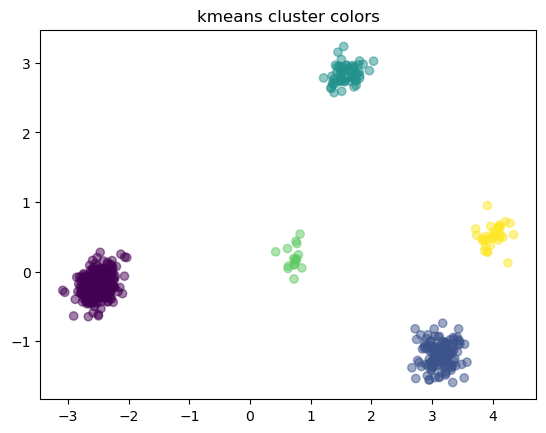

In [133]:
from sklearn.cluster import KMeans

# Lets do some clustering!
kmeans = KMeans(n_clusters=5, random_state=10)      # 1. create a KMeans object and set your number of clusters
kmeans.fit(df.values)                               # 2. fit the object to the data using kmeans.fit
y_kmeans = kmeans.predict(df)                       # 3. Get the list of clusters using kmeans.predict
clusters = np.array(y_kmeans)                       # Name the returned array of cluster assignments "clusters"
print(clusters)

# Count the clusters in a data frame
df['clusters'] = clusters                           # create a new column in the dataframe with the KMeans cluster assignments
print('cluster size:\n', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects

# Make a PCA plot colored by the kmeans clusters
cluster_to_color = {                                # Assign colors to clusters in dictionary
                    0:'green', 
                    1:'orange', 
                    2:'blue', 
                    3:'red', 
                    4:'purple'} 
kmeans_colors = []                                  # Make an emply list for the color assignments                          
for cluster in y_kmeans:                            # Use a for loop to iterate through the dataframe and assign a color to each point based on cluster
    kmeans_colors.append(cluster_to_color[cluster])

plt.scatter(X_pca[:,0],                             # Generate scatter plot
            X_pca[:,1], 
            c = clusters,                           # Color by cluster
            alpha=0.5)                              # Set transparency
plt.title('kmeans cluster colors')                  # Set title



## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

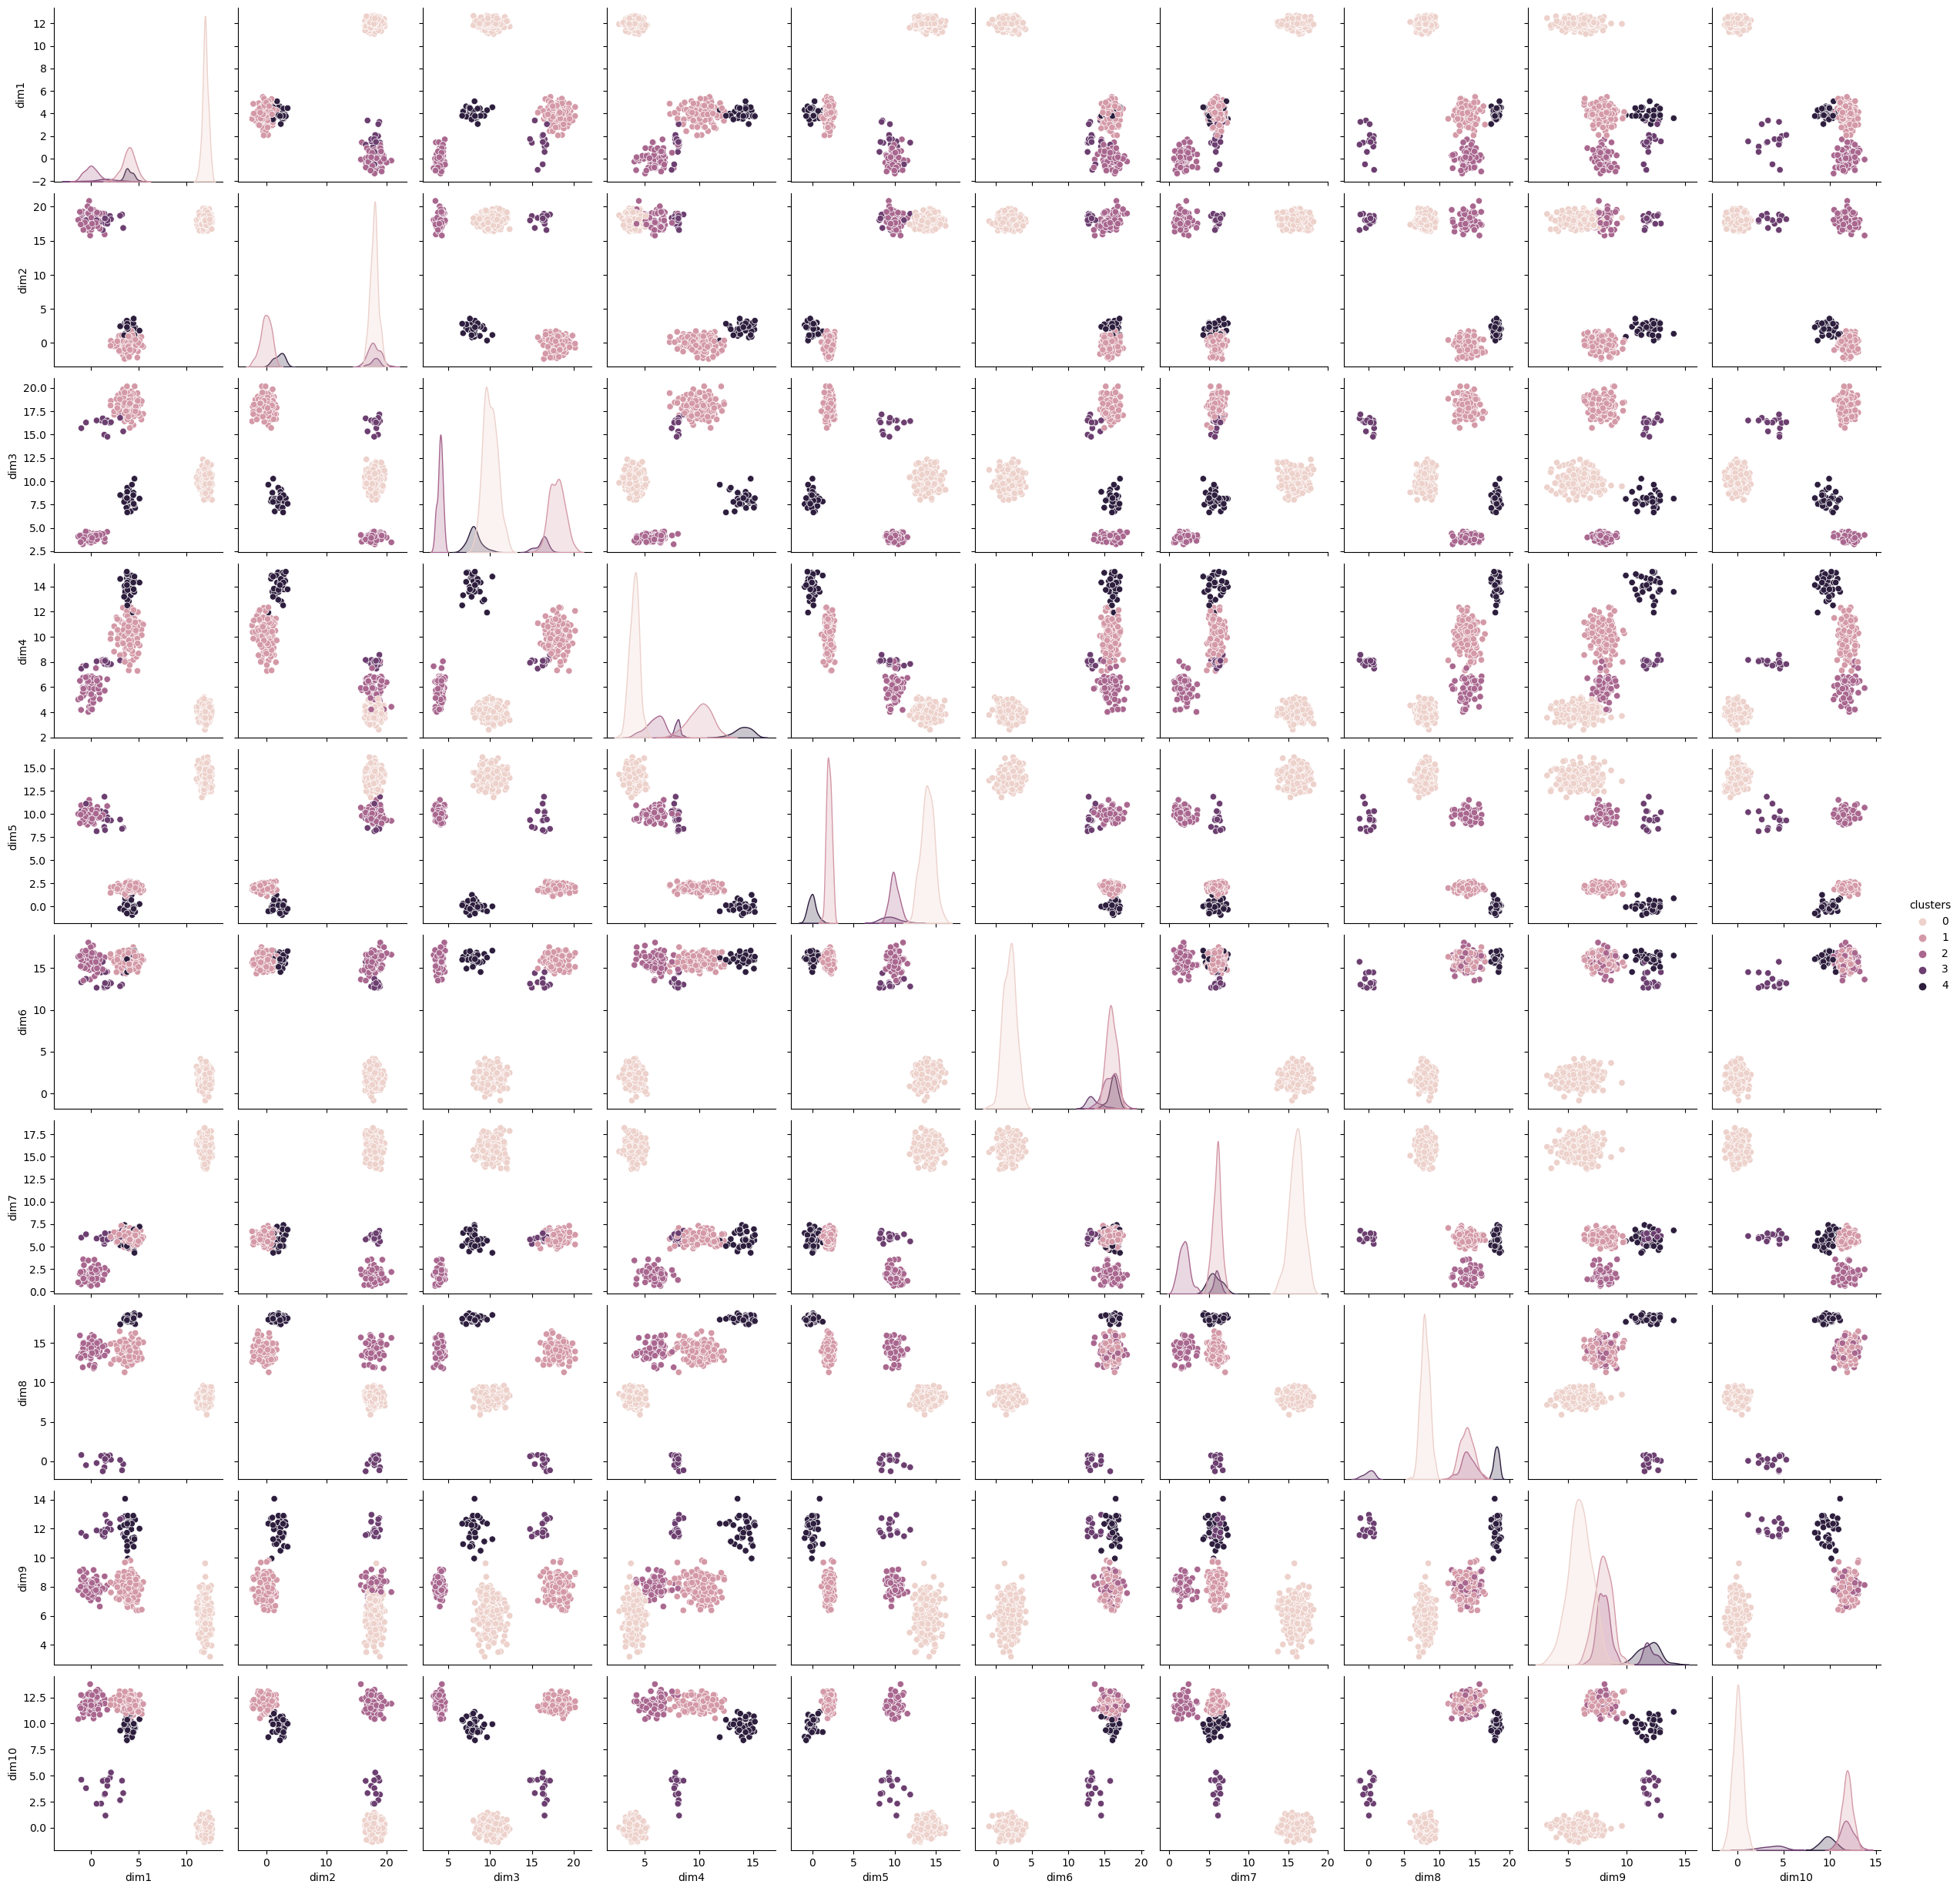

In [134]:
import seaborn as sns

sns.pairplot(df, hue='clusters') # Badass pairplot

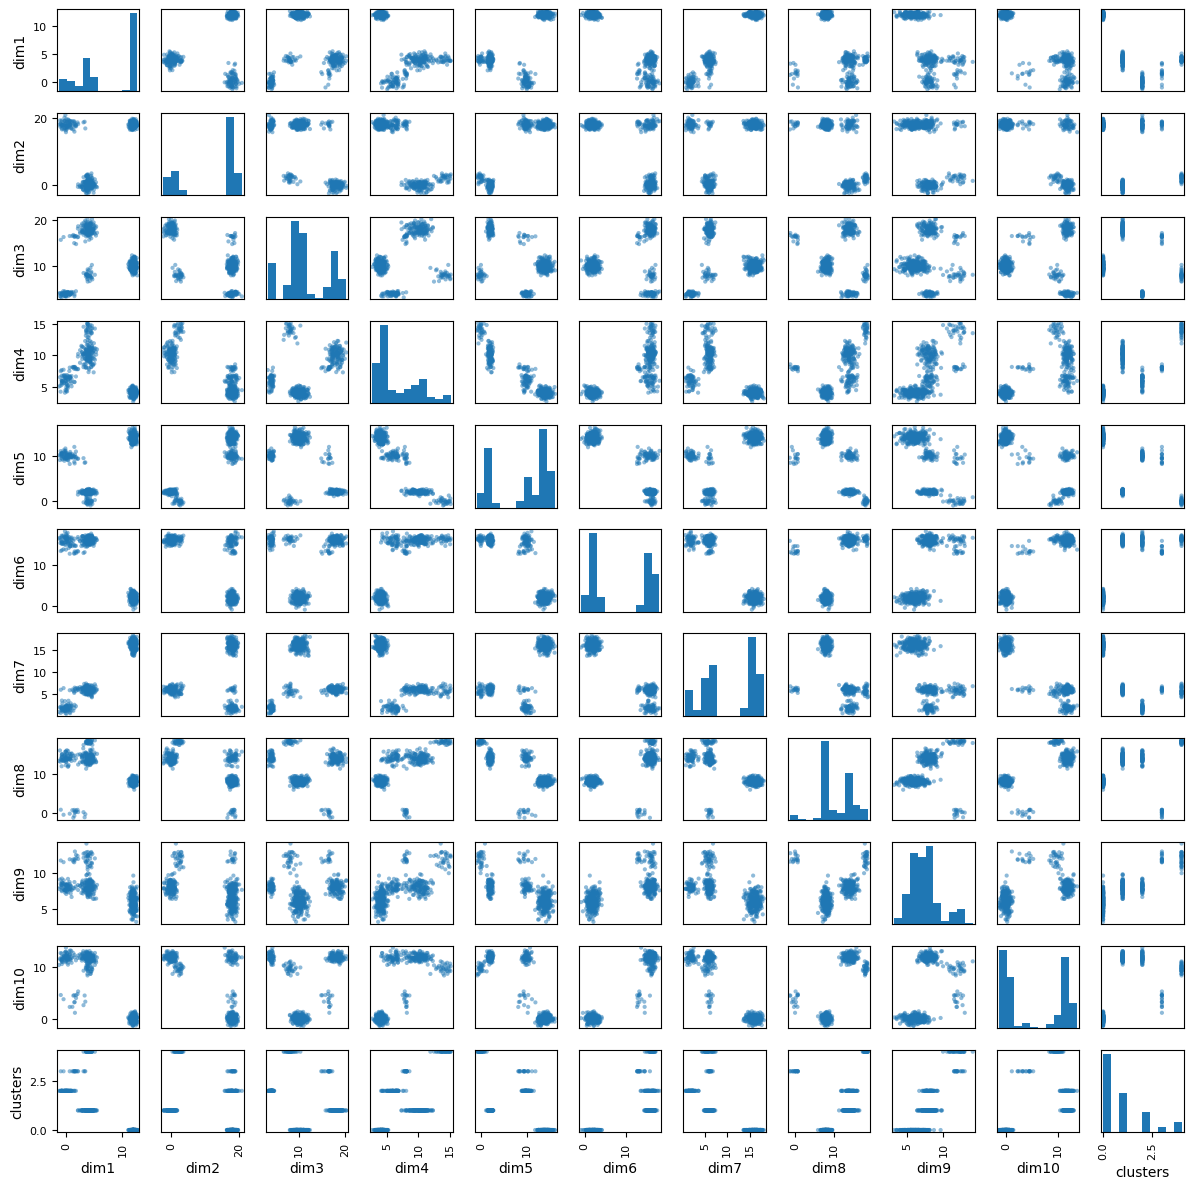

In [112]:
pd.plotting.scatter_matrix(df, figsize = (12,12))   # Lame pairplot
plt.tight_layout()

## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/Users/elanathieme/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/elanathieme/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'TSNE babyyyy')

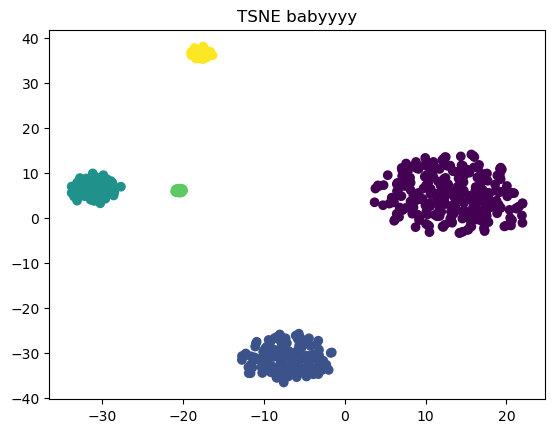

In [125]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)                           # 1. create the TSNE object
X_tsne = tsne.fit_transform(df.values)                  # 2. Fit the data to the model and transform to a new array
plt.scatter(X_tsne[:,0],                                # Generate scatter plot of the two components
            X_tsne[:,1],    
            c = clusters)                               # Color by the kmeans cluster assignment
plt.title('TSNE babyyyy')                               # Set plot title
